In [1]:
import torch
import matplotlib.pyplot as plt

from data import generate_segp_dataset
from neural_networks.standard_nn import DeterministicPerceptron

torch.set_default_dtype(torch.float64)
plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

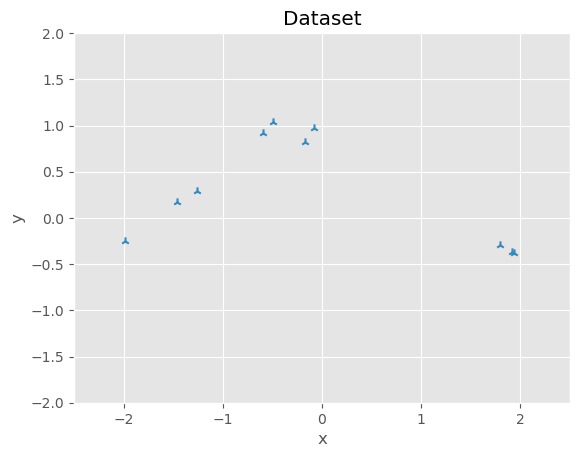

In [80]:
torch.manual_seed(49)
x, y = generate_segp_dataset(input_lower=-2.0, input_upper=2.0, num_points=10, noise_level=0.1, lengthscale=1.0)

plt.scatter(x, y, color='C1', marker='2')
plt.ylim([-2.0, 2.0])
plt.xlim([-2.5, 2.5])
plt.grid(True)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1113.13it/s]


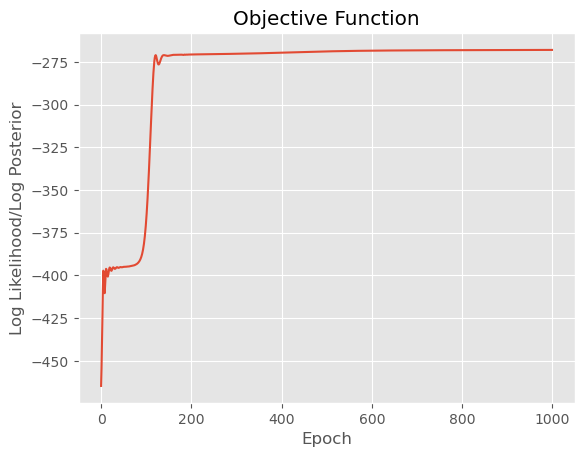

In [81]:
net = DeterministicPerceptron(100, nonlinearity='tanh', prior='Gaussian', bias=True)
loss_evolution = net.train(x, y, epochs=1000, learning_rate=0.01, algorithm='adam', loss_function='map')

plt.plot(loss_evolution)
plt.title("Objective Function")
plt.xlabel("Epoch")
plt.ylabel("Log Likelihood/Log Posterior")
plt.show()

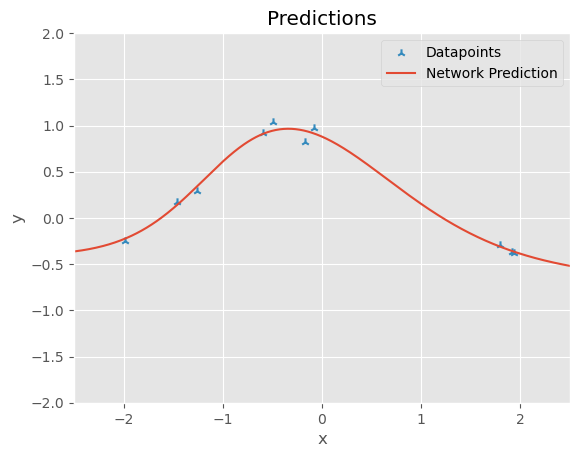

In [82]:
test_x = torch.linspace(-2.5, 2.5, 500)
preds = net(test_x).detach()

plt.scatter(x, y, label='Datapoints', color='C1', marker='2')
plt.plot(test_x, preds, color='C0', label='Network Prediction')
plt.ylim([-2.0, 2.0])
plt.xlim([-2.5, 2.5])
plt.grid(True)
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()